In [1]:
import pandas as pd
try:
    df = pd.read_csv('/content/supply_chain_data.csv')
    print("Dataset loaded successfully.")
    display(df.head())
except FileNotFoundError:
    print("Error: supply_chain_data.csv not found. Please ensure the file is uploaded correctly.")
    df = None

Dataset loaded successfully.


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [2]:
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64


In [3]:
print("Data types before conversion:")
print(df.dtypes)

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    print("\n'Date' column converted to datetime (if it existed).")

numeric_cols = ['HistoricalSales', 'Promotion', 'Price']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        if not pd.api.types.is_numeric_dtype(df[col]):
             print(f"Warning: Column '{col}' is not purely numeric after coercion and might contain non-numeric values.")
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame.")

print("\nData types after potential conversions:")
print(df.dtypes)

display(df.head())

Data types before conversion:
Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object

Data types after potential conversions:
Product type                object
SKU                         object
Price

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [7]:
print("Available columns:")
print(df.columns)


numerical_features = [
    'Price',
    'Availability',
    'Number of products sold',
    'Revenue generated',
    'Stock levels',
    'Lead times',
    'Order quantities',
    'Shipping times',
    'Shipping costs',
    'Costs',
    'Manufacturing lead time',
    'Manufacturing costs',
    'Defect rates'
]

categorical_features = [
    'Product type',
    'Customer demographics',
    'Location',
    'Shipping carriers',
    'Transportation modes',
    'Routes',
    'Inspection results'
]

df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
existing_numerical_features = [col for col in numerical_features if col in df_encoded.columns]

df_processed = df_encoded[existing_numerical_features + [col for col in df_encoded.columns if col.startswith(tuple(categorical_features))]].copy()


print("\nEngineered features (first 5 rows):")
display(df_processed.head())

print("\nShape of the processed DataFrame:")
print(df_processed.shape)

Available columns:
Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

Engineered features (first 5 rows):


,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Costs,...,Location_Mumbai,Shipping carriers_Carrier B,Shipping carriers_Carrier C,Transportation modes_Rail,Transportation modes_Road,Transportation modes_Sea,Routes_Route B,Routes_Route C,Inspection results_Pass,Inspection results_Pending
0,69.808006,55,802,8661.996792,58,7,96,4,2.956572,187.752075,...,True,True,False,False,True,False,True,False,False,True
1,14.843523,95,736,7460.900065,53,30,37,2,9.716575,503.065579,...,True,False,False,False,True,False,True,False,False,True
2,11.319683,34,8,9577.749626,1,10,88,2,8.054479,141.920282,...,True,True,False,False,False,False,False,True,False,True
3,61.163343,68,83,7766.836426,23,13,59,6,1.729569,254.776159,...,False,False,True,True,False,False,False,False,False,False
4,4.805496,26,871,2686.505152,5,3,56,8,3.890548,923.440632,...,False,False,False,False,False,False,False,False,False,False



Shape of the processed DataFrame:
(100, 31)


In [5]:
print("Available columns:")
print(df.columns)

numerical_features = [
    'Price',
    'Availability',
    'Number of products sold',
    'Revenue generated',
    'Stock levels',
    'Lead times',
    'Order quantities',
    'Shipping times',
    'Shipping costs',
    'Costs',
    'Manufacturing lead time',
    'Manufacturing costs',
    'Defect rates'
]

categorical_features = [
    'Product type',
    'Customer demographics',
    'Location',
    'Shipping carriers',
    'Transportation modes',
    'Routes',
    'Inspection results'
]

df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

existing_numerical_features = [col for col in numerical_features if col in df_encoded.columns]

df_processed = df_encoded[existing_numerical_features + [col for col in df_encoded.columns if col.startswith(tuple(categorical_features))]].copy()


print("\nEngineered features (first 5 rows):")
display(df_processed.head())

print("\nShape of the processed DataFrame:")
print(df_processed.shape)

Available columns:
Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

Engineered features (first 5 rows):


,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Costs,...,Location_Mumbai,Shipping carriers_Carrier B,Shipping carriers_Carrier C,Transportation modes_Rail,Transportation modes_Road,Transportation modes_Sea,Routes_Route B,Routes_Route C,Inspection results_Pass,Inspection results_Pending
0,69.808006,55,802,8661.996792,58,7,96,4,2.956572,187.752075,...,True,True,False,False,True,False,True,False,False,True
1,14.843523,95,736,7460.900065,53,30,37,2,9.716575,503.065579,...,True,False,False,False,True,False,True,False,False,True
2,11.319683,34,8,9577.749626,1,10,88,2,8.054479,141.920282,...,True,True,False,False,False,False,False,True,False,True
3,61.163343,68,83,7766.836426,23,13,59,6,1.729569,254.776159,...,False,False,True,True,False,False,False,False,False,False
4,4.805496,26,871,2686.505152,5,3,56,8,3.890548,923.440632,...,False,False,False,False,False,False,False,False,False,False



Shape of the processed DataFrame:
(100, 31)


In [6]:
from sklearn.model_selection import train_test_split

y = df_processed['Number of products sold']
X = df_processed.drop('Number of products sold', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (80, 30)
Shape of X_test: (20, 30)
Shape of y_train: (80,)
Shape of y_test: (20,)


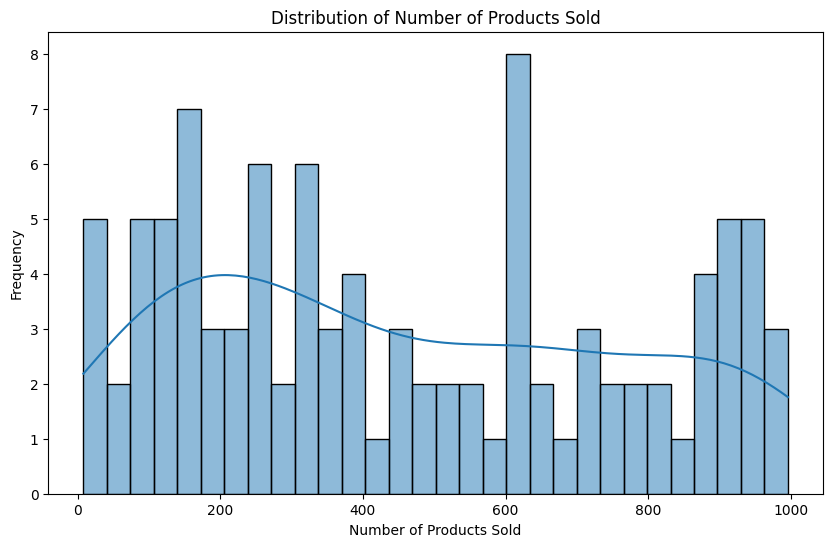

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable 'Number of products sold'
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of products sold'], bins=30, kde=True)
plt.title('Distribution of Number of Products Sold')
plt.xlabel('Number of Products Sold')
plt.ylabel('Frequency')
plt.show()